In [52]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('all_seasons.csv')
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Chris Robinson,VAN,23.0,195.58,90.71840,Western Kentucky,USA,1996,2,...,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [53]:
df.tail()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
9556,9556,Elijah Millsap,PHX,29.0,200.66,97.52228,Alabama-Birmingham,USA,Undrafted,Undrafted,...,1.5,3.0,0.5,-1.8,0.125,0.150,0.199,0.190,0.067,2016-17
9557,9557,Elfrid Payton,ORL,23.0,193.04,83.91452,Louisiana-Lafayette,USA,2014,1,...,12.8,4.7,6.5,-2.7,0.039,0.136,0.213,0.520,0.329,2016-17
9558,9558,Edy Tavares,CLE,25.0,220.98,120.20188,None,Cabo Verde,2014,2,...,4.0,5.5,0.5,15.2,0.160,0.241,0.137,0.633,0.071,2016-17
9559,9559,Willy Hernangomez,NYK,23.0,210.82,108.86208,None,Spain,2015,2,...,8.2,7.0,1.3,-2.8,0.142,0.263,0.202,0.564,0.116,2016-17
9560,9560,Wilson Chandler,DEN,30.0,203.20,102.05820,DePaul,USA,2007,1,...,15.7,6.5,2.0,-1.7,0.052,0.178,0.221,0.545,0.097,2016-17


In [54]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [55]:
df = df[df['gp'] >= 50]

In [56]:
df1 = df.copy(deep=False)
df1 = df1.drop(['Unnamed: 0', 'country','gp','college','team_abbreviation','draft_year','draft_round', 'draft_number','oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'], axis=1)
df2 = df.copy(deep=False)
df2 = df2.drop(['Unnamed: 0','age','player_height','player_weight','net_rating','team_abbreviation','oreb_pct','draft_year','draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast','dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'], axis=1)

In [57]:
df1.head()

,player_name,age,player_height,player_weight,pts,reb,ast,net_rating
2,Matt Bullard,30.0,208.28,106.594120,4.5,1.6,0.9,0.9
3,Marty Conlon,29.0,210.82,111.130040,7.8,4.4,1.4,-9.0
6,Mark West,36.0,208.28,111.583632,3.2,2.7,0.3,3.5
8,Mark Price,33.0,182.88,81.646560,11.3,2.6,4.9,-3.1
9,Mark Jackson,32.0,190.50,83.914520,9.9,4.8,11.4,-2.0


In [58]:
print(len(df1))
df1 = df1.groupby(df1['player_name']).mean()
print(len(df1))
df1.head()

5904
1215


,age,player_height,player_weight,pts,reb,ast,net_rating
player_name,,,,,,,
A.C. Green,35.000000,205.74,102.058200,5.780000,6.060000,0.860000,-1.880000
AJ Price,24.333333,187.96,82.704941,7.166667,1.666667,2.566667,0.233333
Aaron Brooks,27.555556,182.88,73.028312,9.611111,1.666667,3.000000,-1.766667
Aaron Gordon,20.500000,205.74,99.790240,10.950000,5.800000,1.750000,-2.050000
Aaron Gray,23.500000,213.36,122.469840,3.900000,3.350000,0.750000,-3.150000


In [59]:
df2.head()

,player_name,college,country
2,Matt Bullard,Iowa,USA
3,Marty Conlon,Providence,USA
6,Mark West,Old Dominion,USA
8,Mark Price,Georgia Tech,USA
9,Mark Jackson,St. John's (NY),USA


In [60]:
df2.sort_values("player_name", inplace = True) 
df2.head()

,player_name,college,country
299,A.C. Green,Oregon State,USA
1425,A.C. Green,Oregon State,USA
1862,A.C. Green,Oregon State,USA
442,A.C. Green,Oregon State,USA
1008,A.C. Green,Oregon State,USA


In [61]:
print(len(df2))
df2 = df2.drop_duplicates() 
print(len(df2))
df2.head()

5904
1215


,player_name,college,country
299,A.C. Green,Oregon State,USA
6531,AJ Price,Connecticut,USA
8900,Aaron Brooks,Oregon,USA
8901,Aaron Gordon,Arizona,USA
5640,Aaron Gray,Pittsburgh,USA


In [62]:
df3 = df1.merge(df2, left_on='player_name', right_on='player_name')

In [63]:
print(len(df3))
df3.head()

1215


,player_name,age,player_height,player_weight,pts,reb,ast,net_rating,college,country
0,A.C. Green,35.000000,205.74,102.058200,5.780000,6.060000,0.860000,-1.880000,Oregon State,USA
1,AJ Price,24.333333,187.96,82.704941,7.166667,1.666667,2.566667,0.233333,Connecticut,USA
2,Aaron Brooks,27.555556,182.88,73.028312,9.611111,1.666667,3.000000,-1.766667,Oregon,USA
3,Aaron Gordon,20.500000,205.74,99.790240,10.950000,5.800000,1.750000,-2.050000,Arizona,USA
4,Aaron Gray,23.500000,213.36,122.469840,3.900000,3.350000,0.750000,-3.150000,Pittsburgh,USA


In [64]:
df3.sort_values("player_height", inplace = True) 
df3.tail()

,player_name,age,player_height,player_weight,pts,reb,ast,net_rating,college,country
1214,Zydrunas Ilgauskas,30.727273,220.980000,117.933920,12.845455,7.263636,1.145455,2.945455,None,Lithuania
962,Rik Smits,31.333333,223.520000,120.201880,15.566667,6.300000,1.266667,4.366667,Marist,USA
1204,Yao Ming,24.833333,228.176667,139.555139,18.883333,9.416667,1.600000,3.516667,None,China
1047,Shawn Bradley,29.250000,228.600000,119.861686,7.112500,5.625000,0.562500,4.625000,Brigham Young,USA
424,Gheorghe Muresan,26.000000,231.140000,137.438376,10.600000,6.600000,0.400000,6.900000,None,USA


### Similarity Matrix

In [65]:
df4 = df3.copy(deep=False)
df4 = df4.drop(['player_name', 'college', 'country'], axis=1)

AxesSubplot(0.127273,0.125;0.617727x0.755)


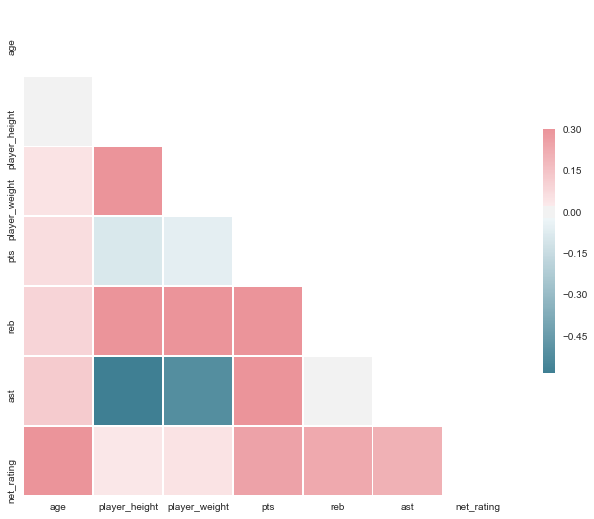

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df4

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

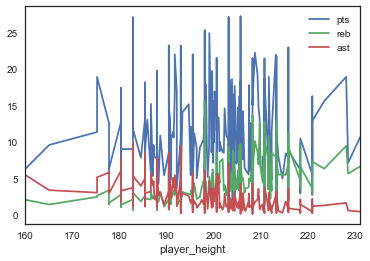

In [67]:
df5 = df3[['player_height','pts','reb','ast']]
df5 = df5.set_index('player_height')
df5.plot()

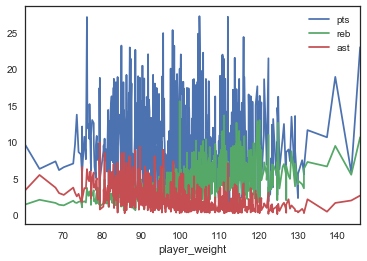

In [68]:
df3.sort_values("player_weight", inplace = True) 
df6 = df3[['player_weight','pts','reb','ast']]
df6 = df6.set_index('player_weight')
df6.plot()

In [255]:
df7 = df3[['player_weight','player_height','age','reb','pts','ast']]
df7.head()

,player_weight,player_height,age,reb,pts,ast
356,60.327736,165.10,30.000000,1.387500,9.550000,3.350000
849,63.956472,160.02,33.333333,2.033333,6.266667,5.433333
1155,68.038800,177.80,21.000000,1.600000,7.300000,3.700000
1164,68.945984,177.80,24.500000,1.350000,6.100000,2.950000
373,70.155563,182.88,29.333333,1.266667,6.500000,2.700000


In [112]:
df7['Value_zscore'] = (df7['reb'] - df7['reb'].mean())/df7['reb'].std(ddof=0)
df7 = df7[abs(df7['Value_zscore']) < 3]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [256]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#df7 = df7.drop(['Value_zscore'], axis=1)
sc2 = StandardScaler()
df7[['player_weight','player_height','age','reb','pts','ast']] = sc2.fit_transform(df7[['player_weight','player_height','age','reb','pts','ast']])
df7.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(key, value)


,player_weight,player_height,age,reb,pts,ast
356,-3.223392,-3.920793,0.898999,-1.154043,0.213305,0.956803
849,-2.933509,-4.477011,1.807653,-0.847990,-0.514584,2.302231
1155,-2.607391,-2.530247,-1.554367,-1.053342,-0.285502,1.182835
1164,-2.534920,-2.530247,-0.600280,-1.171813,-0.551532,0.698480
373,-2.438293,-1.974028,0.717268,-1.211304,-0.462856,0.537029


## Cluster Analysis

In [257]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=4, max_iter= 10000, n_init=100)
kmeans = cluster.fit(df7.values)
graph = cluster.fit_predict(df7.values)

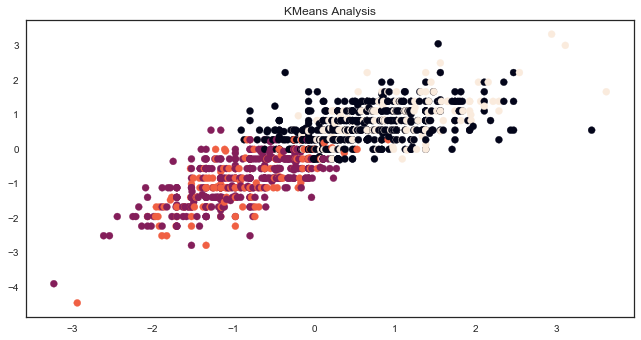

In [258]:
plt.figure(figsize=(24, 12))
plt.subplot(221)
plt.scatter(df7.values[:, 0], df7.values[:, 1], c=graph)
plt.title("KMeans Analysis")
plt.show()

In [259]:
df7['labels'] = kmeans.labels_
df7.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,player_weight,player_height,age,reb,pts,ast,labels
356,-3.223392,-3.920793,0.898999,-1.154043,0.213305,0.956803,1
849,-2.933509,-4.477011,1.807653,-0.847990,-0.514584,2.302231,2
1155,-2.607391,-2.530247,-1.554367,-1.053342,-0.285502,1.182835,1
1164,-2.534920,-2.530247,-0.600280,-1.171813,-0.551532,0.698480,1
373,-2.438293,-1.974028,0.717268,-1.211304,-0.462856,0.537029,1


In [282]:
df8 = df7[df7['labels']==2]
df8 = df8.drop(['labels','pts','ast'], axis=1)
df8.head()

,player_weight,player_height,age,reb
849,-2.933509,-4.477011,1.807653,-0.847990
1081,-2.063861,-1.974028,-0.791098,-0.285644
28,-1.965037,-1.974028,0.428151,-0.075411
664,-1.955155,-1.695919,0.626403,-0.323555
274,-1.934449,-1.974028,-0.386097,-0.592994


## Predictive analysis

In [283]:
df8 = df8.sample(frac=1).reset_index(drop=True)
train=df8[0:(round(len(df8)*.8))] 
test=df8[(round(len(df8)*.8 - 1)):]
trains = np.split(train, [3], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [3], axis=1)
test_x=tests[0]
test_y=tests[1]

In [284]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [285]:
train_x.head()

,player_weight,player_height,age
0,-0.070917,-0.305373,-0.872876
1,-1.415248,-1.139701,-0.109607
2,-1.157978,-1.038570,0.428151
3,-0.614447,-0.305373,1.171595
4,0.122338,0.158142,-1.009175


In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(train_x.values, train_y.values)
reg.score(train_x.values, train_y.values)

reg.coef_

array([[ 0.19339469,  0.19773929, -0.00715913]])

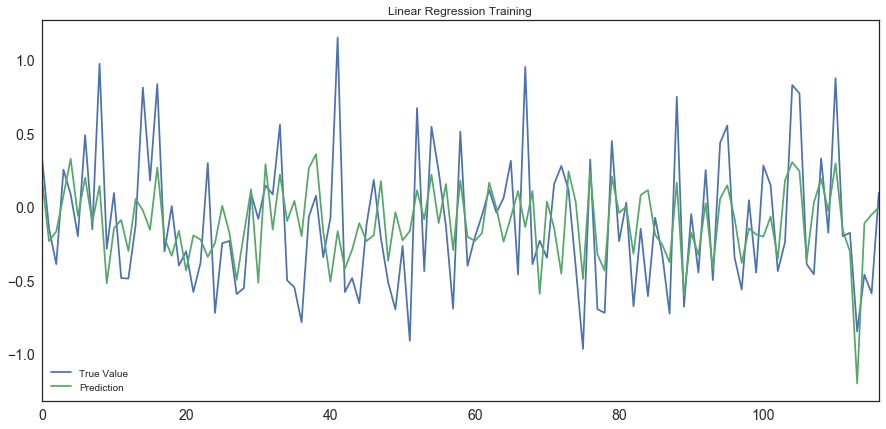

adj train r^2 = 0.274724423465619
train mse = 0.14873998911890432


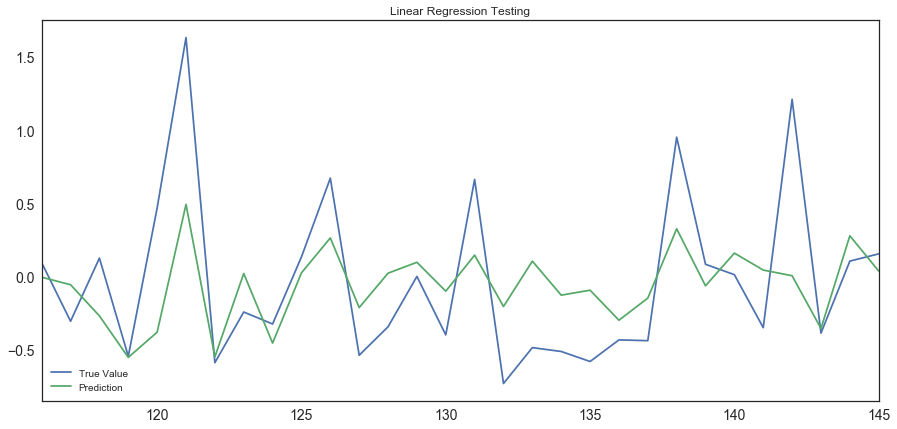

['player_weight', 'player_height', 'age']
adj test r^2 = 0.33060025625639966
test mse = 0.21018086398466848


In [287]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['reb'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.reb, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.reb, reg.predict(train_x.values))))
test_y['reb'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.reb, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.reb, test_y.prediction)))

In [288]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()
reg.fit(train_x.values, train_y.values.ravel())

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

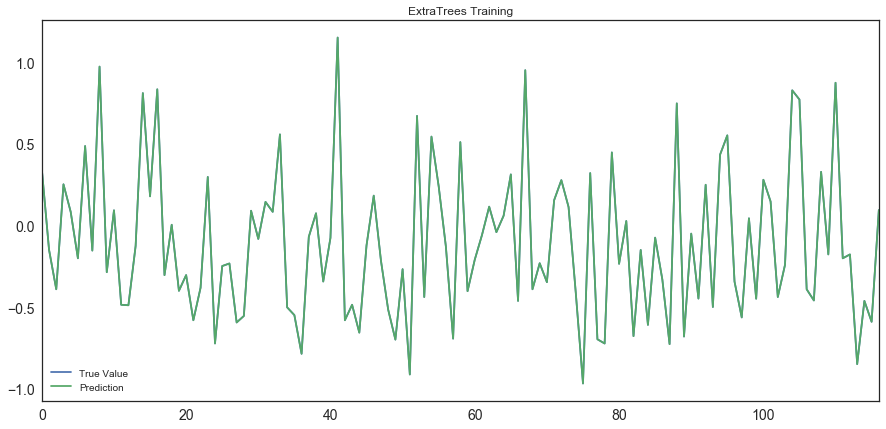

adj train r^2 = 1.0
train mse = 4.236222830667138e-33


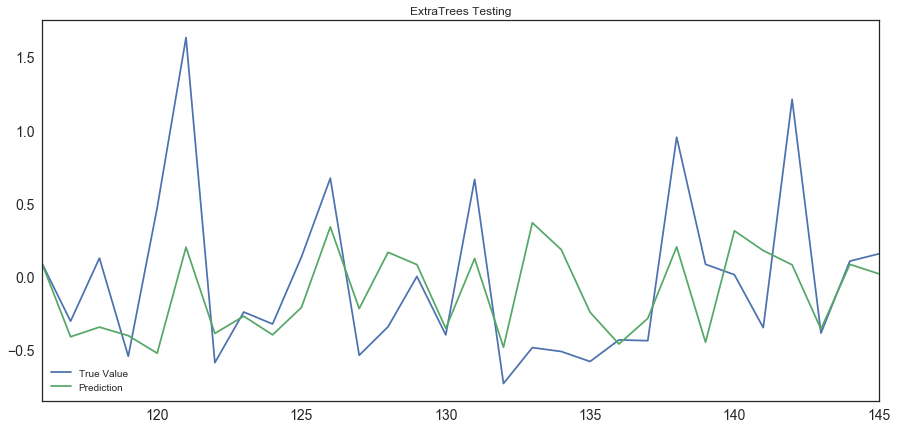

['player_weight', 'player_height', 'age']
adj test r^2 = 0.13720336406955302
test mse = 0.27090440962640494


In [289]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['reb'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.reb, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.reb, reg.predict(train_x.values))))
test_y['reb'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.reb, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.reb, test_y.prediction)))

In [290]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

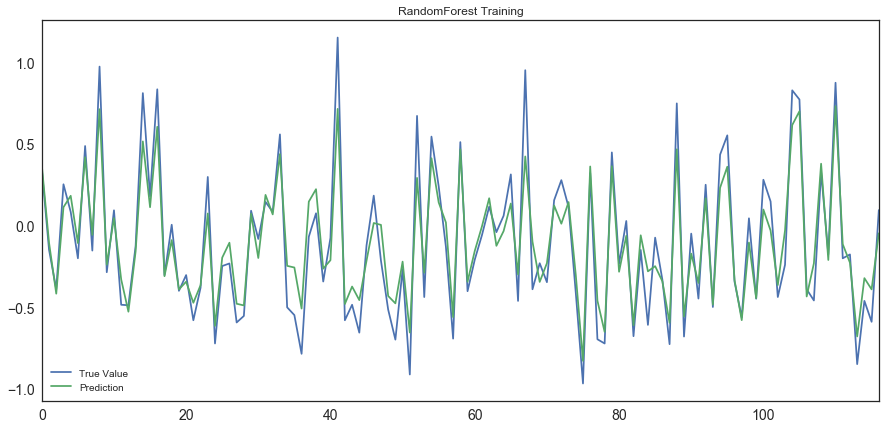

adj train r^2 = 0.880187684169156
train mse = 0.02457118801400267


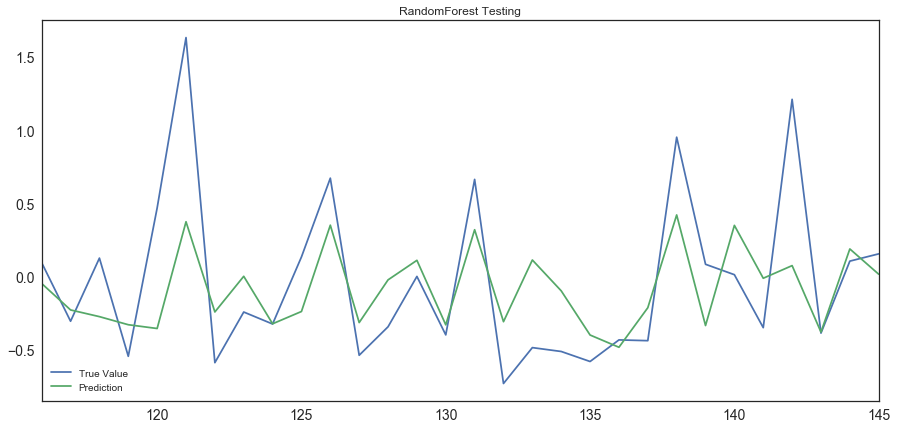

['player_weight', 'player_height', 'age']
adj test r^2 = 0.364689227858506
test mse = 0.19947746953218434


In [291]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['reb'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.reb, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.reb, reg.predict(train_x.values))))
test_y['reb'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.reb, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.reb, test_y.prediction)))

In [292]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.001)
reg.fit(train_x.values, train_y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

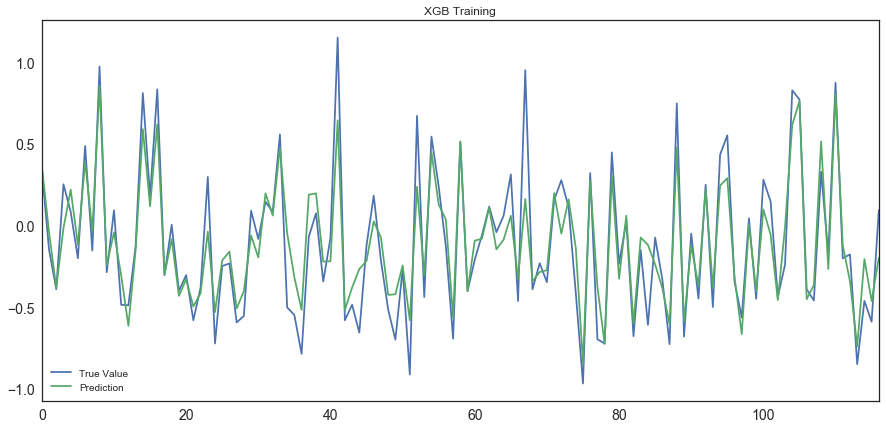

adj train r^2 = 0.8325760668946106
train mse = 0.034335409593320695


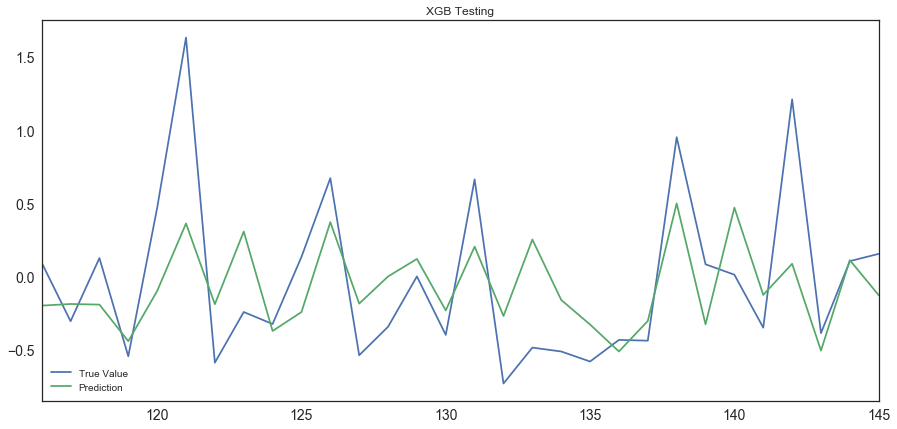

['player_weight', 'player_height', 'age']
adj test r^2 = 0.3329927224855498
test mse = 0.20942966767215612


In [293]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['reb'].plot(figsize=(15,7), title= 'XGB Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGB Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.reb, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.reb, reg.predict(train_x.values))))
test_y['reb'].plot(figsize=(15,7), title= 'XGB Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'XGB Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.reb, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.reb, test_y.prediction)))

In [294]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [295]:
#K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=3, activation='linear'))
model.add(Dense(32,  activation='linear'))
model.add(Dense(4,  activation='linear'))
#model.add(Dropout(0.003))
#model.add(Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(2, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.values.ravel(), validation_data=[test_x.values, test_y['reb'].values.ravel()], epochs=200,verbose=1,shuffle=False)

Train on 117 samples, validate on 30 samples
Epoch 1/200
117/117 [==============================] - 1s 5ms/step - loss: 0.2853 - val_loss: 0.2588
Epoch 2/200
117/117 [==============================] - 0s 94us/step - loss: 0.1873 - val_loss: 0.2773
Epoch 3/200
117/117 [==============================] - 0s 103us/step - loss: 0.1844 - val_loss: 0.2549
Epoch 4/200
117/117 [==============================] - 0s 107us/step - loss: 0.1646 - val_loss: 0.2299
Epoch 5/200
117/117 [==============================] - 0s 101us/step - loss: 0.1545 - val_loss: 0.2175
Epoch 6/200
117/117 [==============================] - 0s 107us/step - loss: 0.1606 - val_loss: 0.2149
Epoch 7/200
117/117 [==============================] - 0s 98us/step - loss: 0.1555 - val_loss: 0.2151
Epoch 8/200
117/117 [==============================] - 0s 112us/step - loss: 0.1503 - val_loss: 0.2126
Epoch 9/200
117/117 [==============================] - 0s 101us/step - loss: 0.1505 - val_loss: 0.2099
Epoch 10/200
117/117 [==========

117/117 [==============================] - 0s 122us/step - loss: 0.1499 - val_loss: 0.2078
Epoch 80/200
117/117 [==============================] - 0s 95us/step - loss: 0.1499 - val_loss: 0.2078
Epoch 81/200
117/117 [==============================] - 0s 96us/step - loss: 0.1499 - val_loss: 0.2078
Epoch 82/200
117/117 [==============================] - 0s 109us/step - loss: 0.1499 - val_loss: 0.2078
Epoch 83/200
117/117 [==============================] - 0s 105us/step - loss: 0.1499 - val_loss: 0.2078
Epoch 84/200
117/117 [==============================] - 0s 109us/step - loss: 0.1499 - val_loss: 0.2078
Epoch 85/200
117/117 [==============================] - 0s 102us/step - loss: 0.1499 - val_loss: 0.2078
Epoch 86/200
117/117 [==============================] - 0s 108us/step - loss: 0.1499 - val_loss: 0.2078
Epoch 87/200
117/117 [==============================] - 0s 108us/step - loss: 0.1499 - val_loss: 0.2078
Epoch 88/200
117/117 [==============================] - 0s 115us/step - loss: 0

117/117 [==============================] - 0s 93us/step - loss: 0.1500 - val_loss: 0.2078
Epoch 158/200
117/117 [==============================] - 0s 127us/step - loss: 0.1500 - val_loss: 0.2078
Epoch 159/200
117/117 [==============================] - 0s 115us/step - loss: 0.1500 - val_loss: 0.2078
Epoch 160/200
117/117 [==============================] - 0s 114us/step - loss: 0.1500 - val_loss: 0.2078
Epoch 161/200
117/117 [==============================] - 0s 115us/step - loss: 0.1500 - val_loss: 0.2078
Epoch 162/200
117/117 [==============================] - 0s 110us/step - loss: 0.1500 - val_loss: 0.2078
Epoch 163/200
117/117 [==============================] - 0s 112us/step - loss: 0.1500 - val_loss: 0.2078
Epoch 164/200
117/117 [==============================] - 0s 114us/step - loss: 0.1500 - val_loss: 0.2078
Epoch 165/200
117/117 [==============================] - 0s 125us/step - loss: 0.1500 - val_loss: 0.2078
Epoch 166/200
117/117 [==============================] - 0s 104us/step

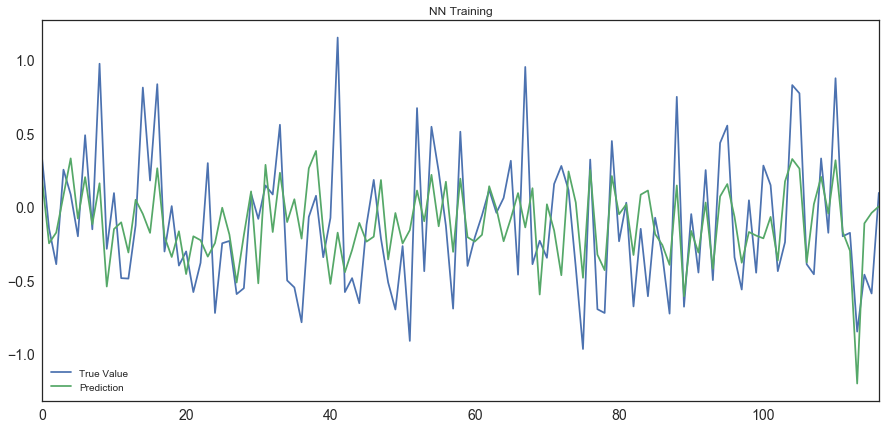

adj train r^2 = 0.27404334603779434
train mse = 0.1488796649228075


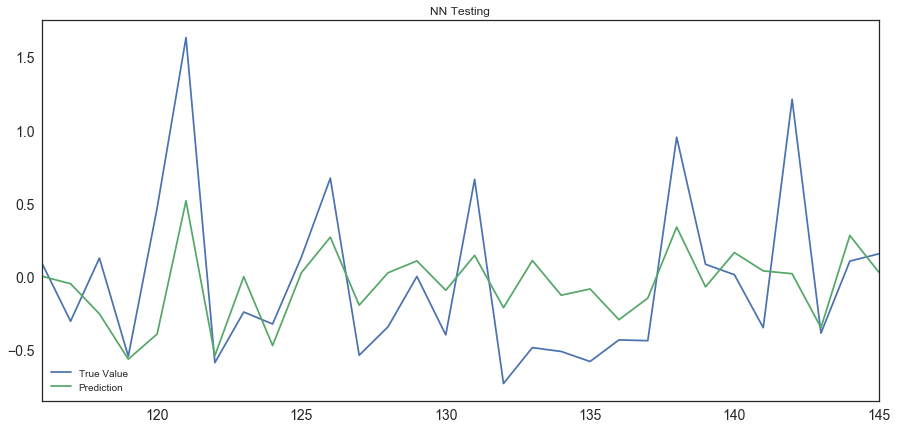

adj test r^2 = 0.3382635683696308
test mse = 0.20777470596623931


In [296]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model.predict(train_x.values)
test_y['prediction'] = model.predict(test_x.values)
train_y2['reb'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.reb, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.reb, model.predict(train_x.values))))
test_y['reb'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.reb, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.reb, test_y.prediction)))

In [297]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [300]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='tanh'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='nadam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.values.ravel(), validation_data=[X_tst_t, test_y['reb'].values.ravel()], epochs=200, verbose=1, shuffle=False)

Train on 117 samples, validate on 30 samples
Epoch 1/200
117/117 [==============================] - 1s 13ms/step - loss: 0.2071 - val_loss: 0.2892
Epoch 2/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1794 - val_loss: 0.2735
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1706 - val_loss: 0.2581
Epoch 4/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1635 - val_loss: 0.2445
Epoch 5/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1580 - val_loss: 0.2335
Epoch 6/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1544 - val_loss: 0.2251
Epoch 7/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.2188
Epoch 8/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.2144
Epoch 9/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1502 - val_loss: 0.2111
Epoch 10/200
117/117 [=======================

Epoch 81/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1369 - val_loss: 0.1709
Epoch 82/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1709
Epoch 83/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1708
Epoch 84/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1368 - val_loss: 0.1708
Epoch 85/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1367 - val_loss: 0.1707
Epoch 86/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1367 - val_loss: 0.1706
Epoch 87/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1706
Epoch 88/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1705
Epoch 89/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.1704
Epoch 90/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1365

117/117 [==============================] - 0s 2ms/step - loss: 0.1290 - val_loss: 0.1746
Epoch 161/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1289 - val_loss: 0.1746
Epoch 162/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1288 - val_loss: 0.1747
Epoch 163/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1287 - val_loss: 0.1748
Epoch 164/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1286 - val_loss: 0.1749
Epoch 165/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1285 - val_loss: 0.1749
Epoch 166/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1284 - val_loss: 0.1750
Epoch 167/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1283 - val_loss: 0.1751
Epoch 168/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1282 - val_loss: 0.1752
Epoch 169/200
117/117 [==============================] - 0s 2ms/step - loss: 0.1281 - v

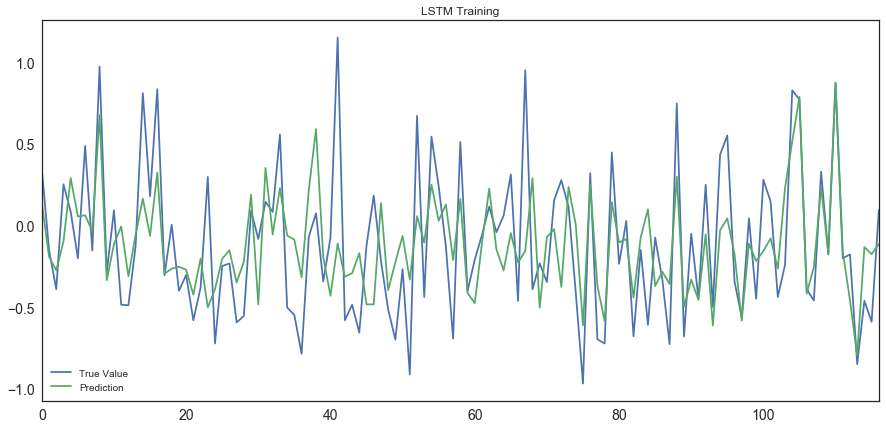

adj train r^2 = 0.3946504420990785
train mse = 0.12414548285984968


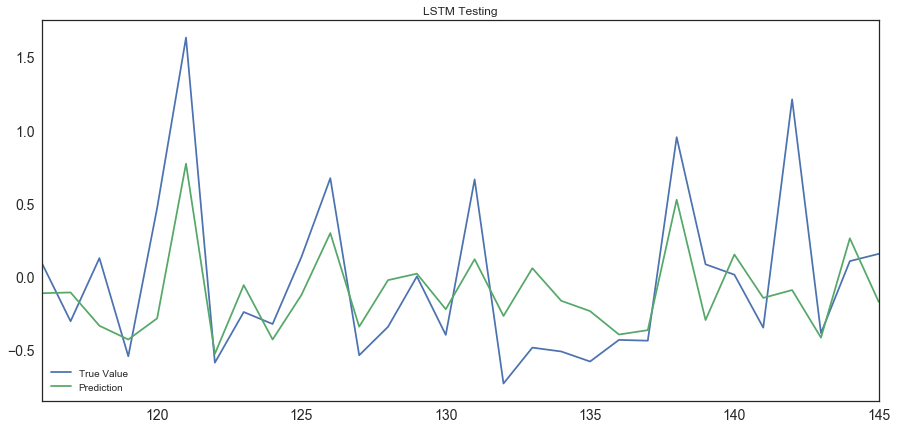

adj test r^2 = 0.437106076634734
test mse = 0.17673973175279165


In [301]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model_lstm.predict(X_tr_t)
test_y['prediction'] = model_lstm.predict(X_tst_t)
train_y2['reb'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.reb, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.reb, model_lstm.predict(X_tr_t))))
test_y['reb'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.reb, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.reb, test_y.prediction)))

In [234]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=2, max_time_mins=2, verbosity=2, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.values.ravel())

Generation 1 - Current best internal CV score: -0.17478926307226353
Generation 2 - Current best internal CV score: -0.17478926307226353
Generation 3 - Current best internal CV score: -0.17427009454033945
Generation 4 - Current best internal CV score: -0.17427009454033945
Generation 5 - Current best internal CV score: -0.17427009454033945
Generation 6 - Current best internal CV score: -0.17427009454033945
Generation 7 - Current best internal CV score: -0.1741402913131727
Generation 8 - Current best internal CV score: -0.1741402913131727
Generation 9 - Current best internal CV score: -0.1741402913131727
Generation 10 - Current best internal CV score: -0.1741402913131727
Generation 11 - Current best internal CV score: -0.1741402913131727
Generation 12 - Current best internal CV score: -0.17232258240027798
Generation 13 - Current best internal CV score: -0.17232258240027798
Generation 14 - Current best internal CV score: -0.17232258240027798
Generation 15 - Current best internal CV score: 

Generation 122 - Current best internal CV score: -0.1661899189410183
Generation 123 - Current best internal CV score: -0.1661899189410183
Generation 124 - Current best internal CV score: -0.1661899189410183
Generation 125 - Current best internal CV score: -0.1661899189410183
Generation 126 - Current best internal CV score: -0.1661899189410183
Generation 127 - Current best internal CV score: -0.1661899189410183
Generation 128 - Current best internal CV score: -0.1661899189410183
Generation 129 - Current best internal CV score: -0.1661899189410183
Generation 130 - Current best internal CV score: -0.1661899189410183
Generation 131 - Current best internal CV score: -0.1661899189410183
Generation 132 - Current best internal CV score: -0.1661899189410183
Generation 133 - Current best internal CV score: -0.1661899189410183
Generation 134 - Current best internal CV score: -0.1661899189410183
Generation 135 - Current best internal CV score: -0.1661899189410183
Generation 136 - Current best inte

Generation 240 - Current best internal CV score: -0.16121643771802868
Generation 241 - Current best internal CV score: -0.16121643771802868
Generation 242 - Current best internal CV score: -0.16081977523411714
Generation 243 - Current best internal CV score: -0.16081977523411714
Generation 244 - Current best internal CV score: -0.16081977523411714
Generation 245 - Current best internal CV score: -0.16081977523411714
Generation 246 - Current best internal CV score: -0.16081977523411714
Generation 247 - Current best internal CV score: -0.16081977523411714
Generation 248 - Current best internal CV score: -0.16081977523411714
Generation 249 - Current best internal CV score: -0.16081977523411714
Generation 250 - Current best internal CV score: -0.16081977523411714
Generation 251 - Current best internal CV score: -0.16081977523411714
Generation 252 - Current best internal CV score: -0.16081977523411714
Generation 253 - Current best internal CV score: -0.16081977523411714
Generation 254 - Cur

Generation 358 - Current best internal CV score: -0.1608197752341171
Generation 359 - Current best internal CV score: -0.1608197752341171
Generation 360 - Current best internal CV score: -0.1608197752341171
Generation 361 - Current best internal CV score: -0.1608197752341171
Generation 362 - Current best internal CV score: -0.1608197752341171
Generation 363 - Current best internal CV score: -0.1608197752341171
Generation 364 - Current best internal CV score: -0.1608197752341171
Generation 365 - Current best internal CV score: -0.1608197752341171
Generation 366 - Current best internal CV score: -0.1608197752341171
Generation 367 - Current best internal CV score: -0.1608197752341171
Generation 368 - Current best internal CV score: -0.1608197752341171
Generation 369 - Current best internal CV score: -0.1608197752341171
Generation 370 - Current best internal CV score: -0.1608197752341171
Generation 371 - Current best internal CV score: -0.1608197752341171
Generation 372 - Current best inte

Generation 478 - Current best internal CV score: -0.1608197752341171
Generation 479 - Current best internal CV score: -0.1608197752341171
Generation 480 - Current best internal CV score: -0.1608197752341171
Generation 481 - Current best internal CV score: -0.1608197752341171
Generation 482 - Current best internal CV score: -0.1608197752341171
Generation 483 - Current best internal CV score: -0.1608197752341171
Generation 484 - Current best internal CV score: -0.1608197752341171
Generation 485 - Current best internal CV score: -0.1608197752341171
Generation 486 - Current best internal CV score: -0.1608197752341171
Generation 487 - Current best internal CV score: -0.1608197752341171
Generation 488 - Current best internal CV score: -0.1608197752341171
Generation 489 - Current best internal CV score: -0.1608197752341171
Generation 490 - Current best internal CV score: -0.1608197752341171
Generation 491 - Current best internal CV score: -0.1608197752341171
Generation 492 - Current best inte

Generation 597 - Current best internal CV score: -0.1608197752341171
Generation 598 - Current best internal CV score: -0.1608197752341171
Generation 599 - Current best internal CV score: -0.1608197752341171
Generation 600 - Current best internal CV score: -0.1608197752341171
Generation 601 - Current best internal CV score: -0.1608197752341171
Generation 602 - Current best internal CV score: -0.1608197752341171
Generation 603 - Current best internal CV score: -0.1608197752341171
Generation 604 - Current best internal CV score: -0.1608197752341171
Generation 605 - Current best internal CV score: -0.1608197752341171
Generation 606 - Current best internal CV score: -0.1608197752341171
Generation 607 - Current best internal CV score: -0.1608197752341171
Generation 608 - Current best internal CV score: -0.1608197752341171
Generation 609 - Current best internal CV score: -0.1608197752341171
Generation 610 - Current best internal CV score: -0.1608197752341171
Generation 611 - Current best inte

Generation 716 - Current best internal CV score: -0.16023654471947074
Generation 717 - Current best internal CV score: -0.16023654471947074
Generation 718 - Current best internal CV score: -0.16023654471947074
Generation 719 - Current best internal CV score: -0.16023654471947074
Generation 720 - Current best internal CV score: -0.16023654471947074
Generation 721 - Current best internal CV score: -0.16023654471947074
Generation 722 - Current best internal CV score: -0.16023654471947074
Generation 723 - Current best internal CV score: -0.16023654471947074
Generation 724 - Current best internal CV score: -0.16023654471947074
Generation 725 - Current best internal CV score: -0.16023654471947074
Generation 726 - Current best internal CV score: -0.16023651178642515
Generation 727 - Current best internal CV score: -0.16023651178642515
Generation 728 - Current best internal CV score: -0.16023651178642515
Generation 729 - Current best internal CV score: -0.16023651178642515
Generation 730 - Cur

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=2,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

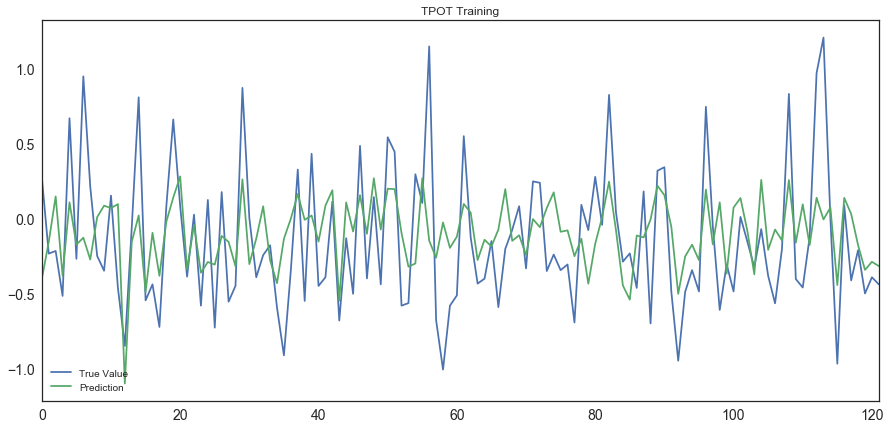

adj train r^2 = 0.2135158286508967
train mse = 0.1663245045511685


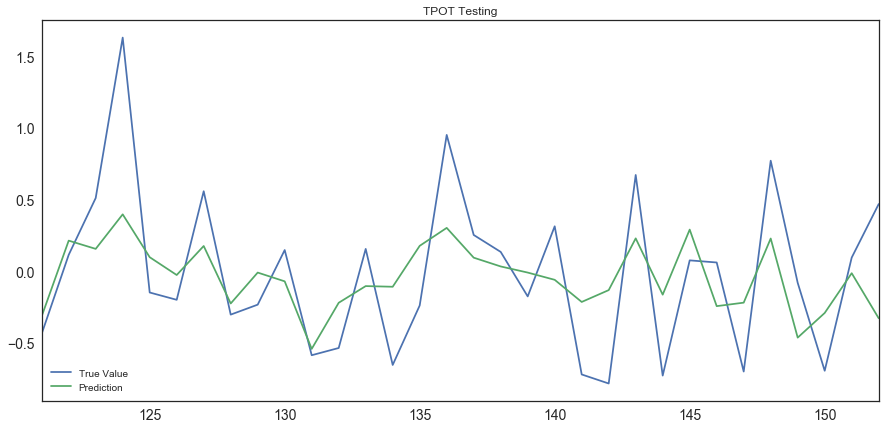

adj test r^2 = 0.36540066705036645
test mse = 0.19065202570106207


In [235]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = tpot.predict(train_x.values)
test_y['prediction'] = tpot.predict(test_x.values)
train_y2['reb'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.reb, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.reb, train_y2.prediction)))
test_y['reb'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.reb, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.reb, test_y.prediction)))